# Visualizing Wikipedia article histories

## Revision trees

Article histories are linear.

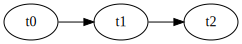

In [1]:
import graphviz
linear = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
linear.node('t0')
linear.node('t1')
linear.node('t2')
linear.edges([
        ('t0', 't1'),
        ('t1', 't2')
    ])
linear

But in reality there are a lot of reversions.

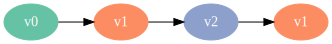

In [2]:
reversions = graphviz.Digraph(
    graph_attr={'rankdir': 'LR'},
    node_attr={'style': 'filled', 'fontcolor': 'white'},
)
reversions.node('t0', label='v0', color='#66c2a5')
reversions.node('t1', label='v1', color='#fc8d62')
reversions.node('t2', label='v2', color='#8da0cb')
reversions.node('t3', label='v1', color='#fc8d62')
reversions.edges([
        ('t0', 't1'),
        ('t1', 't2'),
        ('t2', 't3'),
    ])
reversions

A better way to show article histories is as a tree.

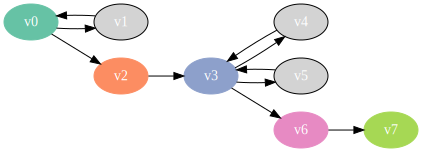

In [3]:
full_tree = graphviz.Digraph(
    graph_attr={'rankdir': 'LR'},
    node_attr={'style': 'filled', 'fontcolor': 'white'},
)
full_tree.node('v0', color='#66c2a5')
full_tree.node('v1')
full_tree.node('v2', color='#fc8d62')
full_tree.node('v3', color='#8da0cb')
full_tree.node('v4')
full_tree.node('v5')
full_tree.node('v6', color='#e78ac3')
full_tree.node('v7', color='#a6d854')

full_tree.edges([
        ('v0', 'v1'),
        ('v1', 'v0'),
        ('v0', 'v2'),
        ('v2', 'v3'),
        ('v3', 'v4'),
        ('v4', 'v3'),
        ('v3', 'v5'),
        ('v5', 'v3'),
        ('v3', 'v6'),
        ('v6', 'v7'),
    ])
full_tree

## What does a real Wikipedia article look like?

To draw a real revision tree, first we need to get all of the revisions to an article.

In [4]:
import wikivision
revisions = wikivision.get_article_revisions('splendid_fairywren')
revisions.head(n=4)

,rev_id,parent_id,timestamp,wikitext,rev_sha1,parent_sha1,rev_version,parent_version,rev_type
365,129420980,0,2007-05-09 02:59:16,{{Taxobox\n| color = pink\n| name = Splendid F...,0860c6aa51c866f79dcc1e54ec994f09c01b37bf,False,0,0,NaN
364,129422530,129420980,2007-05-09 03:07:36,{{Taxobox\n| color = pink\n| name = Splendid F...,f21f402dd42b893f8301f22cf51063afe8f65e48,0860c6aa51c866f79dcc1e54ec994f09c01b37bf,1,0,branch
363,129539246,129422530,2007-05-09 15:41:56,{{Taxobox\n| color = pink\n| name = Splendid F...,552a572722c7527358db0a7274fe61ef759306e1,f21f402dd42b893f8301f22cf51063afe8f65e48,2,1,branch
362,129712279,129539246,2007-05-10 02:21:32,{{Taxobox\n| color = pink\n| name = Splendid F...,833667d437fbe3b2f7aefc538a6acdc9f0b33f5a,552a572722c7527358db0a7274fe61ef759306e1,3,2,branch


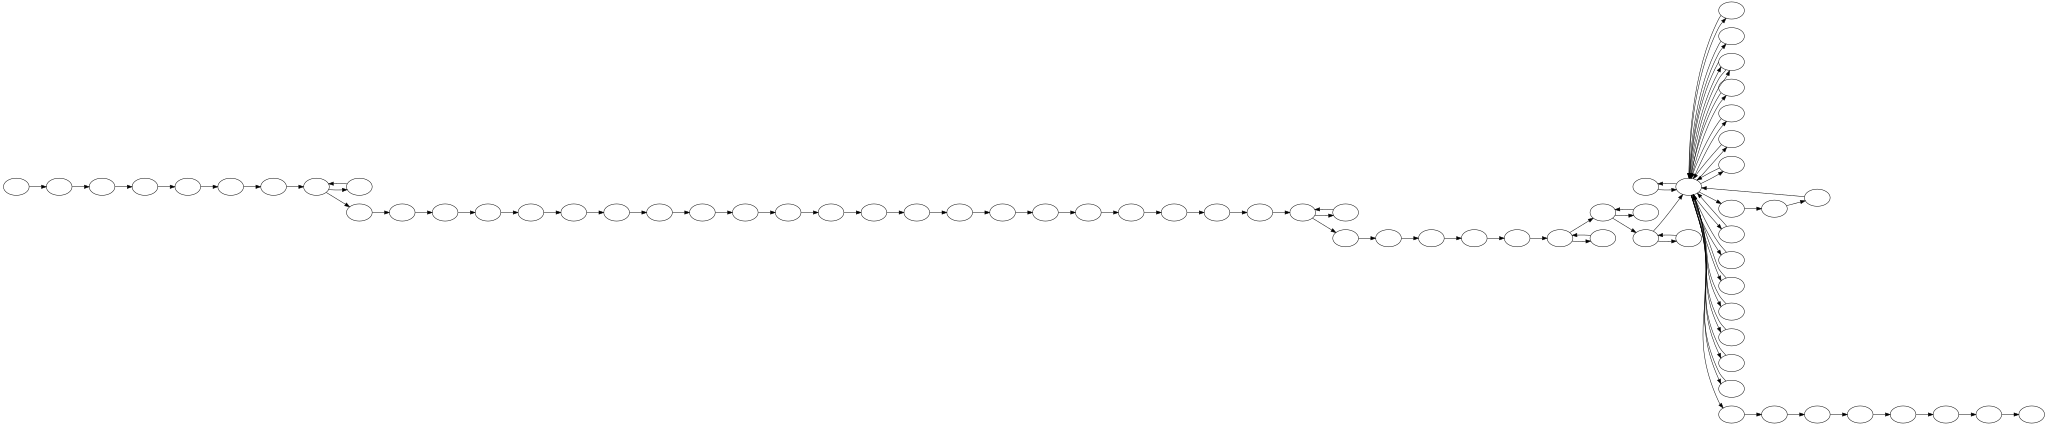

In [5]:
splendid_fairywren = wikivision.graph_article_revisions('splendid_fairywren')
splendid_fairywren

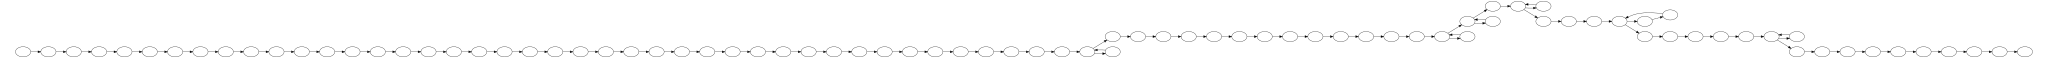

In [6]:
deepmind = wikivision.graph_article_revisions('Google_DeepMind')
deepmind

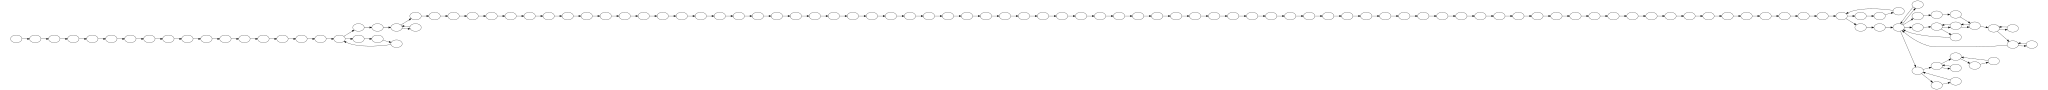

In [7]:
shepseskare = wikivision.graph_article_revisions('Shepseskare')
shepseskare

## What do edit wars look like?

[Wikipedia's lamest edit wars](http://www.informationisbeautiful.net/visualizations/wikipedia-lamest-edit-wars/).

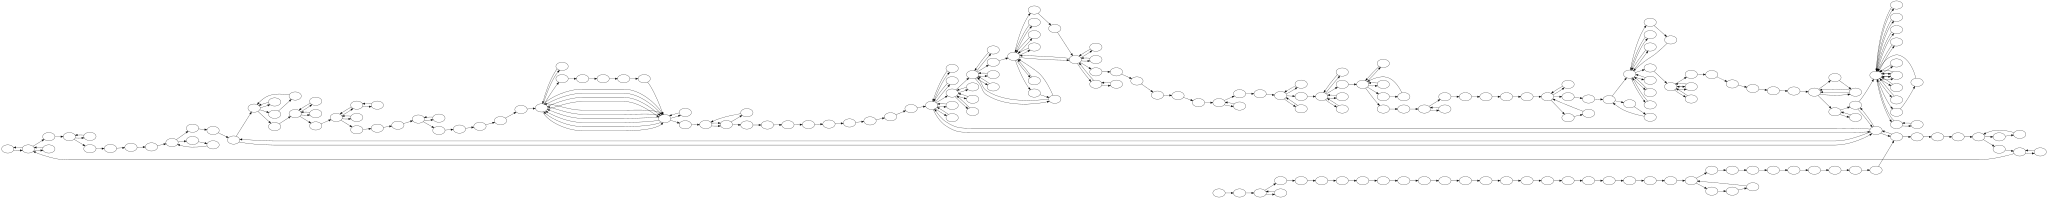

In [8]:
preteen = wikivision.graph_article_revisions('Preadolescence')
preteen

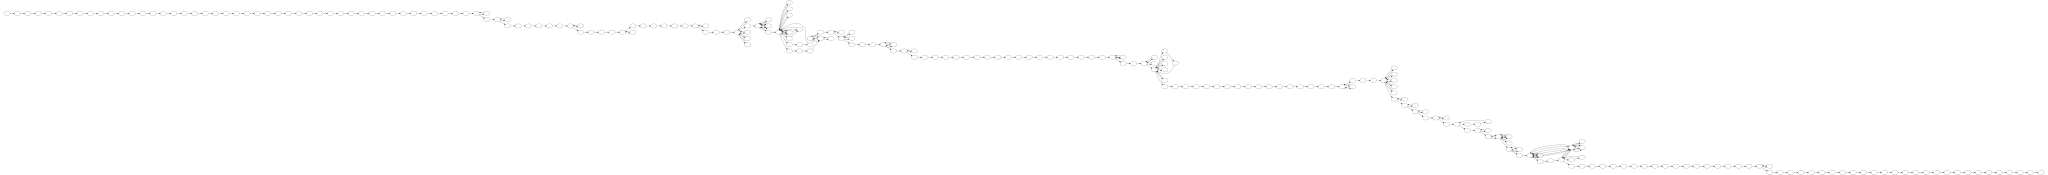

In [9]:
street_fighter = wikivision.graph_article_revisions('Balrog_(Street_Fighter)')
street_fighter

## Counting edits

This is how edits should be counted.

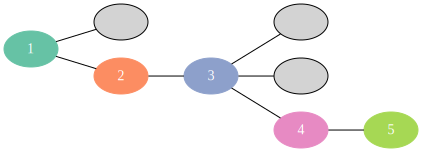

In [10]:
simple = graphviz.Graph(
    graph_attr={'rankdir': 'LR'},
    node_attr={'style': 'filled', 'fontcolor': 'white'},
)
simple.node('v0', label='1', color='#66c2a5')
simple.node('v1', label='')
simple.node('v2', label='2', color='#fc8d62')
simple.node('v3', label='3', color='#8da0cb')
simple.node('v4', label='')
simple.node('v5', label='')
simple.node('v6', label='4', color='#e78ac3')
simple.node('v7', label='5', color='#a6d854')

simple.edges([
        ('v0', 'v1'),
        ('v0', 'v2'),
        ('v2', 'v3'),
        ('v3', 'v4'),
        ('v3', 'v5'),
        ('v3', 'v6'),
        ('v6', 'v7'),
    ])
simple